In [1]:
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display as ds
import itertools
from sklearn.decomposition import PCA as pca
from multiprocessing import Pool
from matplotlib import cm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #credits - sklearn
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [10]:
#templates=[np.loadtxt('./data_set/digit_data/'+i+'/1.txt') for i in ['zero','one','two','three','four','five','six','seven','eight','nine']]

#test=[np.loadtxt('./data_set/digit_data/four/'+str(i)+'.txt') for i in range(1,161)]

listing=os.listdir('./data_set/digit_recognition/data/isolated/1/')
ones=np.array([np.loadtxt('./data_set/digit_recognition/data/isolated/1/'+infile,skiprows=1) for infile in listing])

listing=os.listdir('./data_set/digit_recognition/data/isolated/4/')
fours=np.array([np.loadtxt('./data_set/digit_recognition/data/isolated/4/'+infile,skiprows=1) for infile in listing])

listing=os.listdir('./data_set/digit_recognition/data/isolated/6/')
sixes=np.array([np.loadtxt('./data_set/digit_recognition/data/isolated/6/'+infile,skiprows=1) for infile in listing])

N=len(ones)
ones_train=ones[:int(math.ceil(N*8/10))]
ones_test=ones[int(math.ceil(N*8/10)):]

N=len(fours)
fours_train=fours[:int(math.ceil(N*8/10))]
fours_test=fours[int(math.ceil(N*8/10)):]

N=len(sixes)
sixes_train=sixes[:int(math.ceil(N*8/10))]
sixes_test=sixes[int(math.ceil(N*8/10)):]


x=1
for i in test:
    subplot(1,1,1)
    ds.waveplot(i)
    
    x+=1
#subplot(1,6,x)
#ds.waveplot(two)


In [4]:
def d(x,y):
    return np.linalg.norm(x-y)
 
def dtw(X):
    A,B=X
    M=A.shape[0]
    N=B.shape[0]
    cost=np.empty((M,N))
    cost[0,0] = d(A[0], B[0])
    for i in range(1,M):
        cost[i,0]=cost[i-1,0]+d(A[i],B[0])
 
    for j in range(1,N):
        cost[0,j]=cost[0,j-1]+d(A[0],B[j])
 
    for i in range(1,M):
        for j in range(1,N):
            cost[i,j] = np.min(np.array([cost[i-1,j],cost[i,j-1],cost[i-1,j-1]]))+d(A[i],B[j])
 
    return cost[-1][-1]

In [5]:
def bestr(samples,n=4):
    dist=np.zeros(samples.shape[0])
    
    p=Pool(4)
    for i in range(samples.shape[0]):
        x=p.map(dtw,[(samples[i],samples[j]) for j in range(i+1,samples.shape[0])])
        dist[i]+=sum(x)
        c=0
        for j in range(i+1,samples.shape[0]):
            dist[j]+=x[c]
            c+=1
    return np.argsort(dist)[:n]

In [6]:

best_ones=bestr(ones_train,n=4)
best_fours=bestr(fours_train,n=4)
best_sixes=bestr(sixes_train,n=4)


In [11]:
ones_train=[ones_train[i] for i in best_ones]
fours_train=[fours_train[i] for i in best_ones]
sixes_train=[sixes_train[i] for i in best_ones]


In [1]:
#testing
lable=['one','four','six']

conf=np.zeros((3,3))
p=Pool(4)
count=0
tp=0
print 'testing one'
for sample in ones_test:
    count+=1
    x=p.map(dtw,[(sample,i) for i in ones_train])
    y=p.map(dtw,[(sample,i) for i in fours_train])
    z=p.map(dtw,[(sample,i) for i in sixes_train])
    
    
    x.sort()
    y.sort()
    z.sort()
    
    alls=np.vstack((x[:4],y[:4],z[:4]))
    
    alls=alls.flatten()
    alls.sort()
    alls=alls[:4]
    vote=[0,0,0]
    #print alls
    for t in alls:
        if t in x:
            vote[0]+=1
            
        if t in y:
            vote[1]+=1
        if t in z:
            vote[2]+=1
    print lable[np.argmax(vote)]   
    if np.argmax(vote)==0:
        tp+=1
        conf[0,0]+=1
    elif np.argmax(vote)==1:
        conf[0,1]+=1
    else:
        conf[0,2]+=1

print 'testing four'
for sample in fours_test:
    count+=1
    x=p.map(dtw,[(sample,i) for i in ones_train])
    y=p.map(dtw,[(sample,i) for i in fours_train])
    z=p.map(dtw,[(sample,i) for i in sixes_train])
    
    
    x.sort()
    y.sort()
    z.sort()
    
    alls=np.vstack((x[:4],y[:4],z[:4]))
    
    alls=alls.flatten()
    alls.sort()
    alls=alls[:4]
    vote=[0,0,0]
    #print alls
    for t in alls:
        if t in x:
            vote[0]+=1
        if t in y:
            vote[1]+=1
        if t in z:
            vote[2]+=1
    print lable[np.argmax(vote)]
    if np.argmax(vote)==1:
        tp+=1
        conf[1,1]+=1
    elif np.argmax(vote)==0:
        conf[1,0]+=1
    else:
        conf[1,2]+=1


print 'testing six'
for sample in sixes_test:
    count+=1
    x=p.map(dtw,[(sample,i) for i in ones_train])
    y=p.map(dtw,[(sample,i) for i in fours_train])
    z=p.map(dtw,[(sample,i) for i in sixes_train])
    
    
    x.sort()
    y.sort()
    z.sort()
    
    alls=np.vstack((x[:4],y[:4],z[:4]))
    
    alls=alls.flatten()
    alls.sort()
    alls=alls[:4]
    vote=[0,0,0]
    #print alls
    for t in alls:
        if t in x:
            vote[0]+=1
        if t in y:
            vote[1]+=1
        if t in z:
            vote[2]+=1
    print lable[np.argmax(vote)]
    if np.argmax(vote)==2:
        tp+=1
        conf[2,2]+=1
    elif np.argmax(vote)==1:
        conf[2,1]+=1
    else:
        conf[2,0]+=1

print (tp*1.0)/count

    
    

NameError: name 'np' is not defined

[[ 12.   0.   0.]
 [  3.   9.   0.]
 [  0.   0.  12.]]
Confusion matrix, without normalization
[[ 12.   0.   0.]
 [  3.   9.   0.]
 [  0.   0.  12.]]


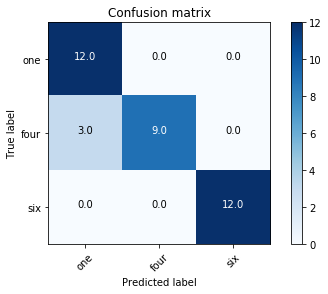

In [9]:
print conf
plot_confusion_matrix(conf,['one','four','six'],normalize=False)
plt.savefig('./results/two.eps',format='eps')
plt.show()


cost=np.array(cost)
imshow(cost, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))